In [1]:
# anomaly detection
# outlier detection
# https://www.pyimagesearch.com/2020/01/20/intro-to-anomaly-detection-with-opencv-computer-vision-and-scikit-learn/

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import imageio
import os
from PIL import Image


#import sys
#sys.path 
#!{sys.executable} -m pip install --upgrade pip
#!{sys.executable} -m pip install -q -U keras-tuner
import keras_tuner as kt



tr = pd.read_csv('data/XYtr.csv')
tr1 =tr.copy() 
tr1['cdate'] = pd.to_datetime(tr1['cdate']).values.astype(np.float64)/8.64e+13
tr1 = tr1.fillna(0)


pred = pd.read_csv('data/pred.csv')

te = pd.read_csv('data/Xte.csv')
te1 = te.copy()
te1['cdate'] = pd.to_datetime(te1['cdate']).values.astype(np.float64)/8.64e+13
te1 = te1.fillna(0)

In [2]:
zz = np.zeros([tr1.shape[0],28,28])
yy = pd.qcut(tr1['total'], 10, labels = range(10))

In [3]:
found = list()
for ii in range(tr1.shape[0]):
    if ii % 100 == 0:
        print('%d / %d' % (ii, tr1.shape[0]))
    if tr1['ext'][ii] == '.png':
        id = tr1.loc[ii,'id']
        ff = tr1.loc[ii, 'id'] + tr1.loc[ii, 'ext']
        path = 'data/images/images/' + ff
        if not os.path.isfile(path):
            continue
        
        pic = imageio.imread(path)
        pic = Image.fromarray(pic).resize((28,28))
        
        try:
            pic = np.mean(pic,axis = 2)
        except:
            pic = np.array(pic)
        
        found.append(ii)
        # print(pic.shape)
        zz[ii,:,:] = pic


0 / 6914
100 / 6914
200 / 6914
300 / 6914
400 / 6914
500 / 6914
600 / 6914
700 / 6914
800 / 6914
900 / 6914
1000 / 6914
1100 / 6914
1200 / 6914
1300 / 6914
1400 / 6914
1500 / 6914
1600 / 6914
1700 / 6914
1800 / 6914
1900 / 6914
2000 / 6914
2100 / 6914
2200 / 6914
2300 / 6914
2400 / 6914
2500 / 6914
2600 / 6914
2700 / 6914
2800 / 6914
2900 / 6914
3000 / 6914
3100 / 6914
3200 / 6914
3300 / 6914
3400 / 6914
3500 / 6914
3600 / 6914
3700 / 6914
3800 / 6914
3900 / 6914
4000 / 6914
4100 / 6914
4200 / 6914
4300 / 6914
4400 / 6914
4500 / 6914
4600 / 6914
4700 / 6914
4800 / 6914
4900 / 6914
5000 / 6914
5100 / 6914
5200 / 6914
5300 / 6914
5400 / 6914
5500 / 6914
5600 / 6914
5700 / 6914
5800 / 6914
5900 / 6914
6000 / 6914
6100 / 6914
6200 / 6914
6300 / 6914
6400 / 6914
6500 / 6914
6600 / 6914
6700 / 6914
6800 / 6914
6900 / 6914


In [12]:
zzte = np.zeros([tr1.shape[0],28,28])
found = list()
for ii in range(te1.shape[0]):
    if ii % 100 == 0:
        print('%d / %d' % (ii, te1.shape[0]))
    if te1['ext'][ii] == '.png':
        id = te1.loc[ii,'id']
        ff = te1.loc[ii, 'id'] + te1.loc[ii, 'ext']
        path = 'data/images/images/' + ff
        if not os.path.isfile(path):
            continue
        
        pic = imageio.imread(path)
        pic = Image.fromarray(pic).resize((28,28))
        
        try:
            pic = np.mean(pic,axis = 2)
        except:
            pic = np.array(pic)
        
        found.append(ii)
        # print(pic.shape)
        zzte[ii,:,:] = pic

0 / 6914
100 / 6914
200 / 6914
300 / 6914
400 / 6914
500 / 6914
600 / 6914
700 / 6914
800 / 6914
900 / 6914
1000 / 6914
1100 / 6914
1200 / 6914
1300 / 6914
1400 / 6914
1500 / 6914
1600 / 6914
1700 / 6914
1800 / 6914
1900 / 6914
2000 / 6914
2100 / 6914
2200 / 6914
2300 / 6914
2400 / 6914
2500 / 6914
2600 / 6914
2700 / 6914
2800 / 6914
2900 / 6914
3000 / 6914
3100 / 6914
3200 / 6914
3300 / 6914
3400 / 6914
3500 / 6914
3600 / 6914
3700 / 6914
3800 / 6914
3900 / 6914
4000 / 6914
4100 / 6914
4200 / 6914
4300 / 6914
4400 / 6914
4500 / 6914
4600 / 6914
4700 / 6914
4800 / 6914
4900 / 6914
5000 / 6914
5100 / 6914
5200 / 6914
5300 / 6914
5400 / 6914
5500 / 6914
5600 / 6914
5700 / 6914
5800 / 6914
5900 / 6914
6000 / 6914
6100 / 6914
6200 / 6914
6300 / 6914
6400 / 6914
6500 / 6914
6600 / 6914
6700 / 6914
6800 / 6914
6900 / 6914


In [4]:
from imutils import paths
import numpy as np
import cv2

def quantify_image(image,bins = (4,6,3)):
    hist = cv2.calcHist([],[0,1,2], None, bins, [0,180,0,256,0,256])
    hist = cv2.normalize(hist,hist).flatten()

In [5]:
def load_dataset(datasetPath, bins):
    imagePaths = list(paths.list_images(datasetPath))
    data = []
    
    for imagePath in imagePaths:
        image = cv2.imread(imagePath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        
        features = quantify_image(image,bins)
        data.append(features)
        
    return np.array(data)

In [6]:
imagePaths = list(paths.list_images('data/images/images'))
data = []

image = cv2.imread('data/images/images\\00004622ded1897dc44bbf543085eda7.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
#features = quantify_image(image)
image.shape

(15, 15, 3)

In [7]:
zz.transpose(2,0,1).reshape(-1,28).shape

(193592, 28)

In [8]:
# from pyimagesearch.features import load_dataset
from sklearn.ensemble import IsolationForest

#data = load_dataset(datasetPath = 'data/images/images',bins = (3,3,3))

model = IsolationForest(n_estimators = 100, contamination = 0.01, random_state = 42)

model.fit(zz.transpose(2,0,1).reshape(-1,28))

IsolationForest(contamination=0.01, random_state=42)

In [9]:
zz[0,:,:].shape

(28, 28)

In [13]:
zzte = zzte/255
zz = zz/255

In [11]:
import tensorflow as tf
from alibi_detect.od import OutlierAE
from alibi_detect.utils.visualize import plot_instance_score, plot_feature_outlier_image

In [ ]:
zzte = np.zeros([tr1.shape[0],28,28])
found = list()
for ii in range(te1.shape[0]):
    if ii % 100 == 0:
        print('%d / %d' % (ii, te1.shape[0]))
    if te1['ext'][ii] == '.png':
        id = te1.loc[ii,'id']
        ff = te1.loc[ii, 'id'] + te1.loc[ii, 'ext']
        path = 'data/images/images/' + ff
        if not os.path.isfile(path):
            continue
        
        pic = imageio.imread(path)
        pic = Image.fromarray(pic).resize((28,28))
        
        try:
            pic = np.mean(pic,axis = 2)
        except:
            pic = np.array(pic)
        
        found.append(ii)
        # print(pic.shape)
        zzte[ii,:,:] = pic

In [35]:
# inspired by
# https://towardsdatascience.com/simplifing-image-outlier-detection-with-alibi-detect-6aea686bf7ba

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import os
import shutil
from collections import Counter
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, UpSampling2D,\
    Dense, Layer, Reshape, InputLayer, Flatten, Input, MaxPooling2D
from alibi_detect.od import OutlierAE
from alibi_detect.utils.visualize import plot_instance_score, plot_feature_outlier_image

def img_to_np(te1, resize = True):  
    img_array = []
    for ii in range(te1.shape[0]):
        if ii % 100 == 0:
            print('%d / %d' % (ii, te1.shape[0]))
        if te1['ext'][ii] == '.png':
            id = te1.loc[ii,'id']
            ff = te1.loc[ii, 'id'] + te1.loc[ii, 'ext']
            path = 'data/images/images/' + ff
            if not os.path.isfile(path):
                continue
        
            img = Image.open(path).convert("RGB")
            if(resize): 
                img = img.resize((64,64))
            img_array.append(np.asarray(img))
    images = np.array(img_array)
    return images
        



#path_train = "data/images/images"
#path_test = "data/images/images"

train = img_to_np(te1 = tr1)
test = img_to_np(te1 = te1)
train = train.astype('float32') / 255.
test = test.astype('float32') / 255.

0 / 6914
100 / 6914
200 / 6914


C:\Users\Benson\anaconda3\envs\tf\lib\site-packages\PIL\Image.py:973: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


300 / 6914
400 / 6914
500 / 6914
600 / 6914
700 / 6914
800 / 6914
900 / 6914
1000 / 6914
1100 / 6914
1200 / 6914
1300 / 6914
1400 / 6914
1500 / 6914
1600 / 6914
1700 / 6914
1800 / 6914
1900 / 6914
2000 / 6914
2100 / 6914
2200 / 6914
2300 / 6914
2400 / 6914
2500 / 6914
2600 / 6914
2700 / 6914
2800 / 6914
2900 / 6914
3000 / 6914
3100 / 6914
3200 / 6914
3300 / 6914
3400 / 6914
3500 / 6914
3600 / 6914
3700 / 6914
3800 / 6914
3900 / 6914
4000 / 6914
4100 / 6914
4200 / 6914
4300 / 6914
4400 / 6914
4500 / 6914
4600 / 6914
4700 / 6914
4800 / 6914
4900 / 6914
5000 / 6914
5100 / 6914
5200 / 6914
5300 / 6914
5400 / 6914
5500 / 6914
5600 / 6914
5700 / 6914
5800 / 6914
5900 / 6914
6000 / 6914
6100 / 6914
6200 / 6914
6300 / 6914
6400 / 6914
6500 / 6914
6600 / 6914
6700 / 6914
6800 / 6914
6900 / 6914
0 / 6914
100 / 6914
200 / 6914
300 / 6914
400 / 6914
500 / 6914
600 / 6914
700 / 6914
800 / 6914
900 / 6914
1000 / 6914
1100 / 6914
1200 / 6914
1300 / 6914
1400 / 6914
1500 / 6914
1600 / 6914
1700 / 6914

In [37]:
encoding_dim = 1024
dense_dim = [8, 8, 128]

encoder_net = tf.keras.Sequential(
  [
      tf.keras.layers.InputLayer(input_shape=train[0].shape),
      tf.keras.layers.Conv2D(64, 4, strides=2, padding='same', activation=tf.nn.relu),
      tf.keras.layers.Conv2D(128, 4, strides=2, padding='same', activation=tf.nn.relu),
      tf.keras.layers.Conv2D(512, 4, strides=2, padding='same', activation=tf.nn.relu),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(encoding_dim,)
  ])

decoder_net = tf.keras.Sequential(
  [
      tf.keras.layers.InputLayer(input_shape=(encoding_dim,)),
      tf.keras.layers.Dense(np.prod(dense_dim)),
      tf.keras.layers.Reshape(target_shape=dense_dim),
      tf.keras.layers.Conv2DTranspose(256, 4, strides=2, padding='same', activation=tf.nn.relu),
      tf.keras.layers.Conv2DTranspose(64, 4, strides=2, padding='same', activation=tf.nn.relu),
      tf.keras.layers.Conv2DTranspose(3, 4, strides=2, padding='same', activation='sigmoid')
  ])

od = OutlierAE( threshold = 0.001,
                encoder_net=encoder_net,
                decoder_net=decoder_net)

adam = tf.keras.optimizers.Adam(lr=1e-4)

od.fit(train, epochs=100, verbose=True,
       optimizer = adam)

od.infer_threshold(test, threshold_perc=95)

preds = od.predict(test, outlier_type='instance',
            return_instance_score=True,
            return_feature_score=True)

C:\Users\Benson\anaconda3\envs\tf\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


52/52 [=] - 23s 451ms/step - loss_ma: 8.7695e-04


In [57]:
k=0
a = np.zeros(len(preds['data']['is_outlier']))
for ii in range(len(preds['data']['is_outlier'])):
    if te1['ext'][ii] == '.png':
        id = te1.loc[ii,'id']
        ff = te1.loc[ii, 'id'] + te1.loc[ii, 'ext']
        path = 'data/images/images/' + ff
        if(preds['data']['is_outlier'][ii] == 1):
            source = path
            a[k] = ii
        k = k+1


dict1 = {'Filename': te1['id'][a],
     'instance_score': preds['data']['instance_score'],
     'is_outlier': preds['data']['is_outlier']}
     
df = pd.DataFrame(dict1)
df_outliers = df[df['is_outlier'] == 1]

print(df_outliers)

                             Filename  instance_score  is_outlier
0.0  7e79f1a9cb10504dd2fc569d84f2a346        0.010793           1
0.0  7e79f1a9cb10504dd2fc569d84f2a346        0.007903           1
0.0  7e79f1a9cb10504dd2fc569d84f2a346        0.013233           1
0.0  7e79f1a9cb10504dd2fc569d84f2a346        0.007496           1
0.0  7e79f1a9cb10504dd2fc569d84f2a346        0.010613           1
..                                ...             ...         ...
0.0  7e79f1a9cb10504dd2fc569d84f2a346        0.008793           1
0.0  7e79f1a9cb10504dd2fc569d84f2a346        0.006753           1
0.0  7e79f1a9cb10504dd2fc569d84f2a346        0.012693           1
0.0  7e79f1a9cb10504dd2fc569d84f2a346        0.009666           1
0.0  7e79f1a9cb10504dd2fc569d84f2a346        0.007574           1

[168 rows x 3 columns]


In [61]:
print(df_outliers['Filename'].unique())

['7e79f1a9cb10504dd2fc569d84f2a346' 'd5949754359d4e95c5cbaf274a4efc47'
 '31565d91136605f5496c9347634c5a20' '59fcc23207ab2b1827b9f869f6f37286'
 '19426c7d6e7b17fde2a0c0a39d119c6c' '15dd1bf9d5843fa7edf3980a567cc5df'
 '2162bee0ef18ede6b5d328fcaaf571c2' '0814865104e83918db0fc73b306c9dbe'
 '497e0c8c3d9c59cbd748441ce8f3848d' '8e6b843b8ee10ae458e9fa7c2af21e01']


In [78]:
print(df_outliers.sort_values(by = ['instance_score']))

                             Filename  instance_score  is_outlier
0.0  7e79f1a9cb10504dd2fc569d84f2a346        0.006053           1
0.0  7e79f1a9cb10504dd2fc569d84f2a346        0.006055           1
0.0  7e79f1a9cb10504dd2fc569d84f2a346        0.006056           1
0.0  7e79f1a9cb10504dd2fc569d84f2a346        0.006102           1
0.0  7e79f1a9cb10504dd2fc569d84f2a346        0.006128           1
..                                ...             ...         ...
0.0  7e79f1a9cb10504dd2fc569d84f2a346        0.016813           1
0.0  7e79f1a9cb10504dd2fc569d84f2a346        0.017598           1
0.0  7e79f1a9cb10504dd2fc569d84f2a346        0.017924           1
0.0  7e79f1a9cb10504dd2fc569d84f2a346        0.018191           1
0.0  7e79f1a9cb10504dd2fc569d84f2a346        0.020931           1

[168 rows x 3 columns]


In [79]:
print(df_outliers.explode('Filename')['Filename'].value_counts())

7e79f1a9cb10504dd2fc569d84f2a346    159
d5949754359d4e95c5cbaf274a4efc47      1
31565d91136605f5496c9347634c5a20      1
59fcc23207ab2b1827b9f869f6f37286      1
19426c7d6e7b17fde2a0c0a39d119c6c      1
15dd1bf9d5843fa7edf3980a567cc5df      1
2162bee0ef18ede6b5d328fcaaf571c2      1
0814865104e83918db0fc73b306c9dbe      1
497e0c8c3d9c59cbd748441ce8f3848d      1
8e6b843b8ee10ae458e9fa7c2af21e01      1
Name: Filename, dtype: int64


In [65]:
#for name in df_outliers['Filename'].unique():
 #   ff = name + '.png'
 #   path = 'data/images/images/' + ff
 #   if not os.path.isfile(path):
 #       continue
        
#    img = Image.open(path).convert("RGB")
 
#    img = img.resize((64,64))
#    img_array.append(np.asarray(img))
#    images = np.array(img_array)


array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[ 53,  52,  52],
         [ 53,  52,  52],
         [ 53,  52,  52],
         ...,
         [ 53,  53,  53],
         [ 53,  53,  53],
         [ 53,  53,  53]],

        [[ 46,  45,  45],
         [ 46,  45,  45],
         [ 46,  45,  45],
         ...,
         [ 47,  46,  46],
         [ 47,  46,  46],
         [ 47,  46,  46]],

        [[ 43,  42,  42],
         [ 43,  42,  42],
         [ 43,  42,  42],
         ...,
         [ 43,  43,  43],
        

In [66]:
#images = images.astype('float32')/255

In [67]:
#preds1 = od.predict(images, outlier_type='instance',
 #           return_instance_score=True,
 #           return_feature_score=True)

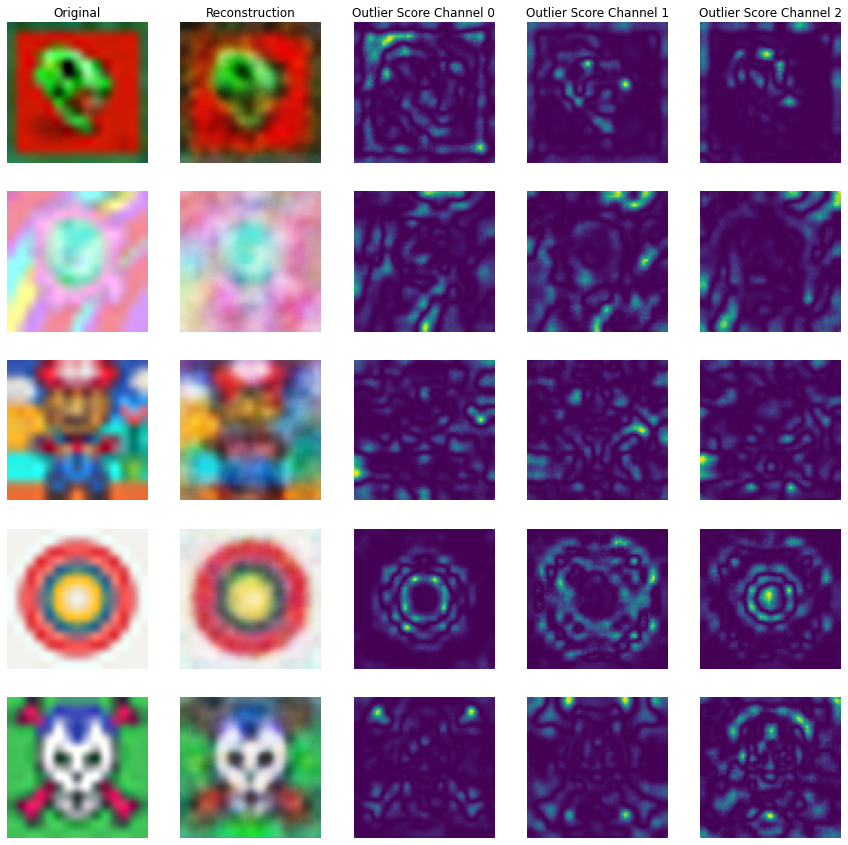

In [72]:
recon = od.ae(test).numpy()

#plot_feature_outlier_image(preds, test, 
 #                          X_recon=recon,  
 #                          max_instances=5,
 #                          outliers_only=True,
  #                         figsize=(15,15))

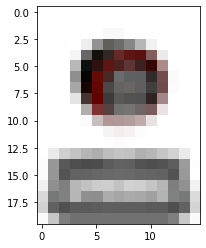

In [75]:
outimg = 'data/images/images/7e79f1a9cb10504dd2fc569d84f2a346.png'
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(outimg)
imgplot = plt.imshow(img)
plt.show()

In [83]:
df_outliers['Filename'].unique()

array(['7e79f1a9cb10504dd2fc569d84f2a346',
       'd5949754359d4e95c5cbaf274a4efc47',
       '31565d91136605f5496c9347634c5a20',
       '59fcc23207ab2b1827b9f869f6f37286',
       '19426c7d6e7b17fde2a0c0a39d119c6c',
       '15dd1bf9d5843fa7edf3980a567cc5df',
       '2162bee0ef18ede6b5d328fcaaf571c2',
       '0814865104e83918db0fc73b306c9dbe',
       '497e0c8c3d9c59cbd748441ce8f3848d',
       '8e6b843b8ee10ae458e9fa7c2af21e01'], dtype=object)